In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
german_df=pd.read_csv('german_credit.csv')
german_df.shape

(1000, 21)

In [3]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [4]:
from sklearn.model_selection import train_test_split
Y = german_df["default"]
X = german_df.drop("default",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)

In [5]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [6]:
german_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [7]:
german_df = pd.get_dummies(german_df, columns=['account_check_status','credit_history','purpose','savings','present_emp_since',
                                              'personal_status_sex','other_debtors','property','other_installment_plans',
                                              'housing','job','telephone','foreign_worker'])
german_df.head(1)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1


In [8]:
german_df.info

<bound method DataFrame.info of      default  duration_in_month  credit_amount  installment_as_income_perc  \
0          0                  6           1169                           4   
1          1                 48           5951                           2   
2          0                 12           2096                           2   
3          0                 42           7882                           2   
4          1                 24           4870                           3   
5          0                 36           9055                           2   
6          0                 24           2835                           3   
7          0                 36           6948                           2   
8          0                 12           3059                           2   
9          1                 30           5234                           4   
10         1                 12           1295                           3   
11         1                 48 

In [9]:
# Print Shape of model data
german_df.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [10]:
german_df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

No need to drop, its already droped

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [11]:
Y = german_df["default"]
X = german_df.drop("default",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.70, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [12]:
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
rfModel = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfModel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [17]:
from sklearn import metrics
yRFpred=rfModel.predict(X_test)
acc=metrics.accuracy_score(y_test,yRFpred)
print(acc)

0.7514285714285714


In [18]:
metrics.confusion_matrix(y_test,yRFpred)

array([[454,  32],
       [142,  72]], dtype=int64)

### Q6 Show the list of the features importance( 1 Marks)

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [22]:
rfModel = RandomForestClassifier()
rfModel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
# Build step forward feature selection
sfs1 = sfs(rfModel, k_features=8, forward=True, scoring='accuracy', cv=5)

In [24]:
# Perform SFFS
sfs1 = sfs1.fit(X_train.values, y_train.values)

In [25]:
sfs1.get_metric_dict()

{1: {'feature_idx': (49,),
  'cv_scores': array([0.68852459, 0.71666667, 0.73333333, 0.73333333, 0.71186441]),
  'avg_score': 0.7167444660553858,
  'feature_names': ('49',),
  'ci_bound': 0.021279725015384637,
  'std_dev': 0.01655634900416819,
  'std_err': 0.008278174502084094},
 2: {'feature_idx': (11, 49),
  'cv_scores': array([0.67213115, 0.71666667, 0.75      , 0.73333333, 0.79661017]),
  'avg_score': 0.7337482634065018,
  'feature_names': ('11', '49'),
  'ci_bound': 0.0523804864671461,
  'std_dev': 0.04075379800872414,
  'std_err': 0.02037689900436207},
 3: {'feature_idx': (11, 27, 49),
  'cv_scores': array([0.73770492, 0.73333333, 0.75      , 0.73333333, 0.79661017]),
  'avg_score': 0.7501963508381958,
  'feature_names': ('11', '27', '49'),
  'ci_bound': 0.030841838989795044,
  'std_dev': 0.02399599853269904,
  'std_err': 0.01199799926634952},
 4: {'feature_idx': (11, 27, 37, 49),
  'cv_scores': array([0.75409836, 0.76666667, 0.75      , 0.71666667, 0.79661017]),
  'avg_score': 0

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
# Use below values
num_folds = 15
seed = 77
kfold = KFold(n_splits=num_folds,random_state=seed)


In [28]:
#Validate the Random Forest model build above using k fold

In [29]:
results = cross_val_score(rfModel, X_train, y_train, cv=kfold)
print(results)

[0.85 0.65 0.75 0.7  0.7  0.75 0.65 0.8  0.75 0.65 0.5  0.6  0.55 0.55
 0.75]


In [30]:
#Calculate Mean score

In [31]:
print("Accuracy: %.3f%% " % (results.mean()*100.0))

Accuracy: 68.000% 


In [32]:
# Calculate score standard deviation using std()

In [33]:
print("Standard deviation: %.3f%%" % (results.std()*100.0))

Standard deviation: 9.626%


# Q8 Print the confusion matrix( 1 Marks)

In [34]:
metrics.confusion_matrix(y_test,yRFpred)

array([[454,  32],
       [142,  72]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [35]:
cr=metrics.classification_report(y_test,yRFpred)
print(cr)

             precision    recall  f1-score   support

          0       0.76      0.93      0.84       486
          1       0.69      0.34      0.45       214

avg / total       0.74      0.75      0.72       700



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [36]:
#Hint: Use roc_curve

In [37]:
from sklearn.metrics import roc_curve

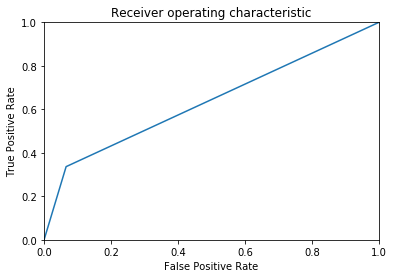

In [38]:
fpr,tpr, _ = roc_curve(y_test,yRFpred)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [39]:
from sklearn.metrics import auc

In [40]:
roc_auc = auc(fpr, tpr)

In [41]:
print('Area Under the curve',roc_auc)

Area Under the curve 0.635302488365832


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [42]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []